# Data Visualization Assignment

In [36]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')


## Load data in a dataframe

In [2]:
startups = pd.read_csv('50_Startups.csv')

## Check for null values

In [3]:
startups.isna().sum()

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

## Dataframe basic information

In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.shape

(50, 5)

##    Understand the dataset and perform descriptive statistics(mean, standard deviation, etc..) 


In [7]:
std_dev = np.sqrt(((startups['RnD'] - startups['RnD'].mean())**2).sum()/(len(startups)-1))
std_dev


45902.25648230753

In [8]:
startups.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


##   Check for missing data and perform cleaning if necessary.e.g  

In [9]:
startups.isna().sum()

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

###   Use .info(), .isna() to check for missing or NaN data and remove those records from the dataframe. Use methods like replacing NaN values with mean/median of the column or estimate NaN values based on neighbouring data points. 


No missing vals present

##    Explore relationships between pairs of features using scatter plots and pair plots. 


In [12]:
def scatterPlot(df):
    for i in df.columns:
        for j in df.columns:
            if i == j: continue
            fig = px.scatter(df, x=i, y=j)
            fig.show()

# scatterPlot(startups)

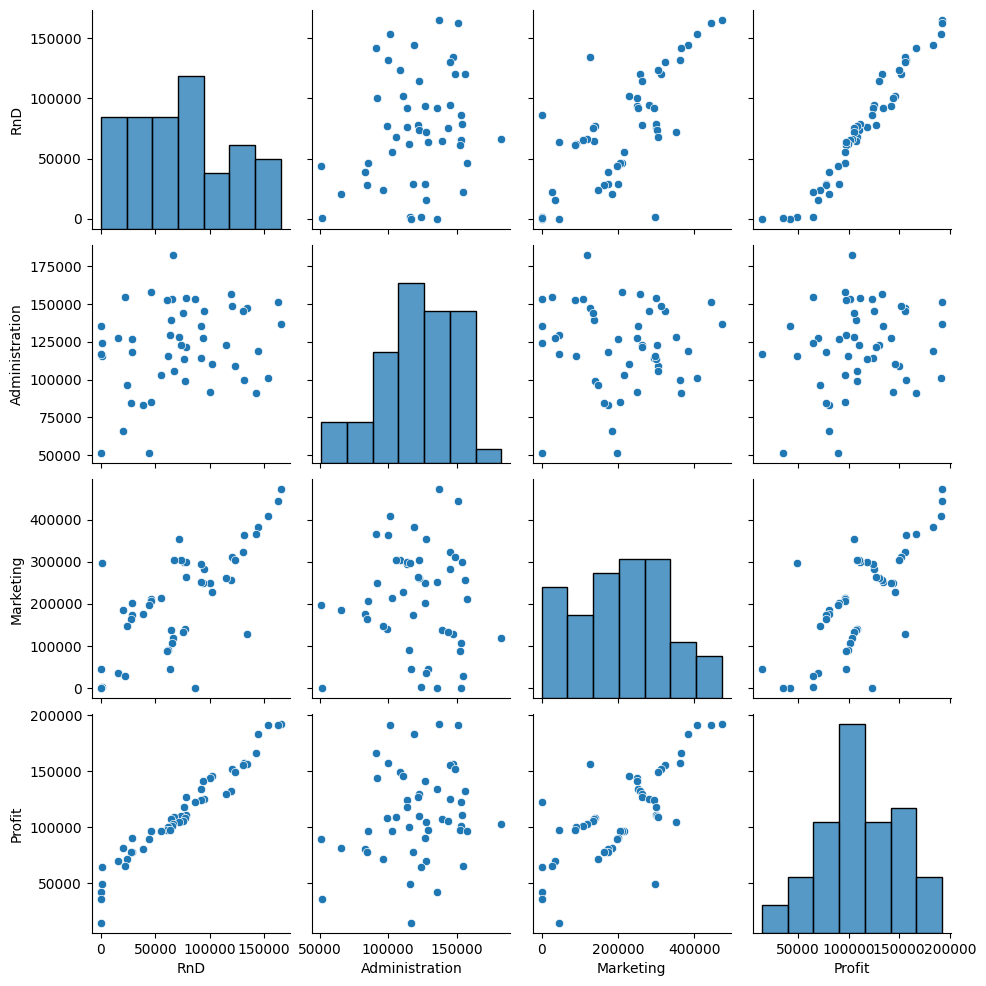

In [13]:
def pairPlot(df):
    fig = sns.pairplot(df)
    fig

pairPlot(startups)

##    What are the different states where the startups are located? Provide a count of startups in each state. 


In [14]:
startups['RnD'].groupby(by=startups['State']).count()

State
California    17
Florida       16
New York      17
Name: RnD, dtype: int64

##    Calculate the total and average profit generated by startups in each state. 


In [15]:
# Average Profit
startups['Profit'].groupby(by=startups['State']).mean()

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

In [16]:
# Total Profit
startups['Profit'].groupby(by=startups['State']).sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

##    Visualize the distribution of profits among the startups using a histogram. 


In [18]:
fig = px.histogram(startups, x='Profit', facet_col='State',color='State',facet_col_wrap=3, title='Statewise Profit Distribution', nbins=15,)
fig.show()

##    Compare the average R&D spend, administration spend, and marketing spend among the startups located in different states. 


In [19]:
startups.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

In [20]:
startups['TotalSpend'] = startups['Marketing'] + startups['Administration'] + startups['RnD']


In [21]:
data = startups.groupby('State').sum()
data

,RnD,Administration,Marketing,Profit,TotalSpend
State,,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98,6255066.88
Florida,1291584.26,1948302.36,3957176.82,1900384.39,7197063.44
New York,1295316.06,2066239.00,3490882.27,1933859.59,6852437.33


In [26]:
fig = px.histogram(startups, y=['Marketing', 'Administration', 'RnD'], x='State', title='Statewise distribution of Spendings')
fig.show()


c:\Users\Chirantan_Degloorkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



##    Compute the correlation matrix between R&D spend, administration spend, marketing spend, and profit. 

In [27]:
startups.iloc[:,0:3].corr()

,RnD,Administration,Marketing
RnD,1.000000,0.241955,0.724248
Administration,0.241955,1.000000,-0.032154
Marketing,0.724248,-0.032154,1.000000


<Axes: >

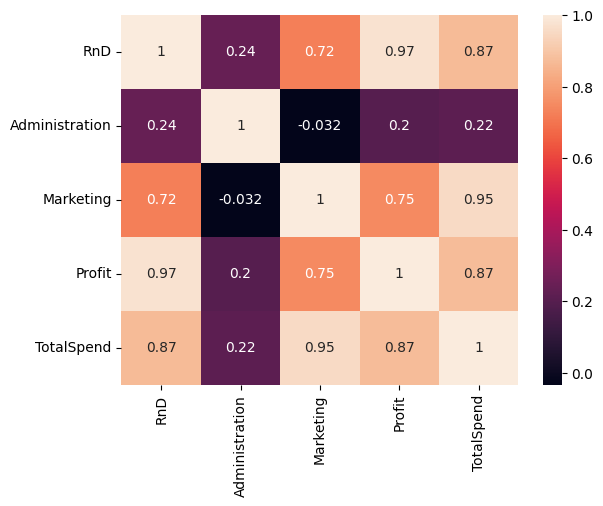

In [28]:
sns.heatmap(data=startups.drop(columns='State').corr(), annot=True)

##    Determine which expenditure (R&D, administration, or marketing) has the highest correlation with profit. 


In [29]:
startups.drop(['State'], axis=1).corr()['Profit'][0:3]

RnD               0.972900
Administration    0.200717
Marketing         0.747766
Name: Profit, dtype: float64

## Pie charts to show statewise spend

In [30]:
data

,RnD,Administration,Marketing,Profit,TotalSpend
State,,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98,6255066.88
Florida,1291584.26,1948302.36,3957176.82,1900384.39,7197063.44
New York,1295316.06,2066239.00,3490882.27,1933859.59,6852437.33


In [32]:
data_melted = data.reset_index().melt(id_vars='State', value_vars=['RnD', 'Marketing', 'Administration'], 
                                      var_name='Category', value_name='Value')

data_melted

,State,Category,Value
0,California,RnD,1099180.46
1,Florida,RnD,1291584.26
2,New York,RnD,1295316.06
3,California,Marketing,3103195.80
4,Florida,Marketing,3957176.82
5,New York,Marketing,3490882.27
6,California,Administration,2052690.62
7,Florida,Administration,1948302.36
8,New York,Administration,2066239.00


In [33]:

fig = px.pie(data_melted, values='Value', names='Category', facet_col='State', hole=0, color_discrete_sequence=px.colors.carto.Vivid)
fig.update_layout(title='Spending Distribution by Category for Each State')
fig.show()

c:\Users\Chirantan_Degloorkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

